In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager, rc

In [2]:
from matplotlib import font_manager, rc
import matplotlib as mpl

mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "NanumGothicCoding"

In [3]:
def load_dataset():
    train = pd.read_csv("../input/predict-meals/train.csv")
    test = pd.read_csv("../input/predict-meals/test.csv")
    sample_submission = pd.read_csv("../input/predict-meals/sample_submission.csv")
    return train, test, sample_submission

In [4]:
train, test, sample_submission = load_dataset()

In [5]:
train.shape, test.shape

((1205, 12), (50, 10))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [8]:
# 편의상 컬럼 분할
object_columns = train.select_dtypes(include="object").columns.to_list()
numerical_columns = ["본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수"]

In [9]:
# 기간을 연월일로 구분하여 활용할 수 있게 합니다.
train["일자"] = train["일자"].astype("str")
dates = train["일자"].str.split("-")

train["연"] = dates.str.get(0)
train["월"] = dates.str.get(1)
train["일"] = dates.str.get(2)

test["일자"] = test["일자"].astype("str")
dates = test["일자"].str.split("-")
test["연"] = dates.str.get(0)
test["월"] = dates.str.get(1)
test["일"] = dates.str.get(2)

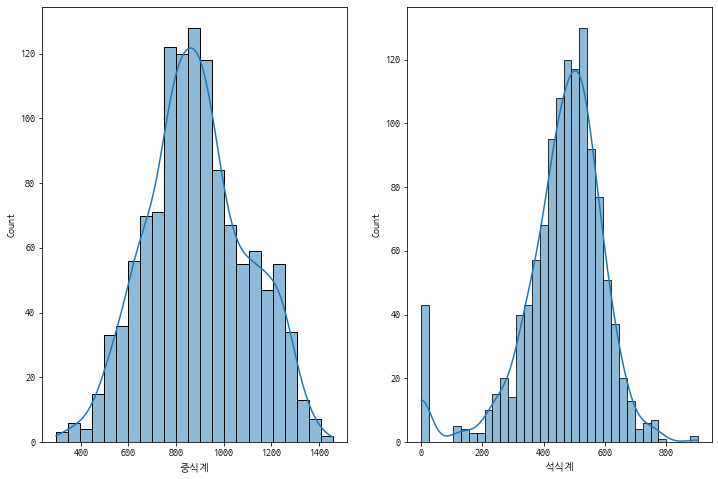

In [11]:
f, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.histplot(x=train["중식계"], ax=ax[0], kde=True)
sns.histplot(x=train["석식계"], ax=ax[1], kde=True)
plt.show()

In [12]:
train[train["석식계"] == 0][["일자", "석식메뉴"]]

,일자,석식메뉴
204,2016-11-30,*
224,2016-12-28,*
244,2017-01-25,*
262,2017-02-22,*
281,2017-03-22,*
306,2017-04-26,*
327,2017-05-31,자기계발의날
346,2017-06-28,*자기계발의날*
366,2017-07-26,가정의날
392,2017-09-01,*


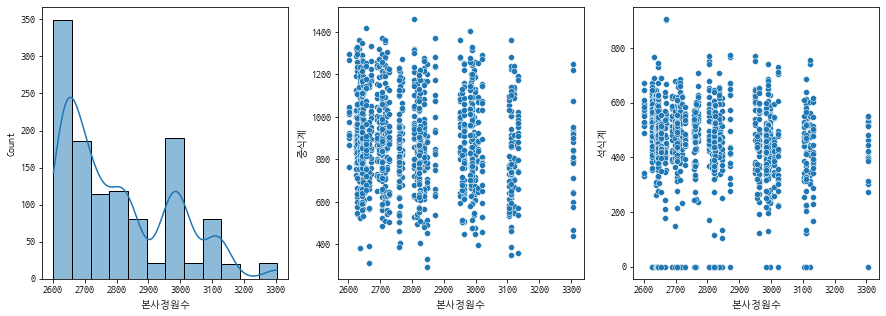

In [13]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(train["본사정원수"], ax=ax[0], kde=True)
sns.scatterplot(data=train, x="본사정원수", y="중식계", ax=ax[1])
sns.scatterplot(data=train, x="본사정원수", y="석식계", ax=ax[2])

plt.show()

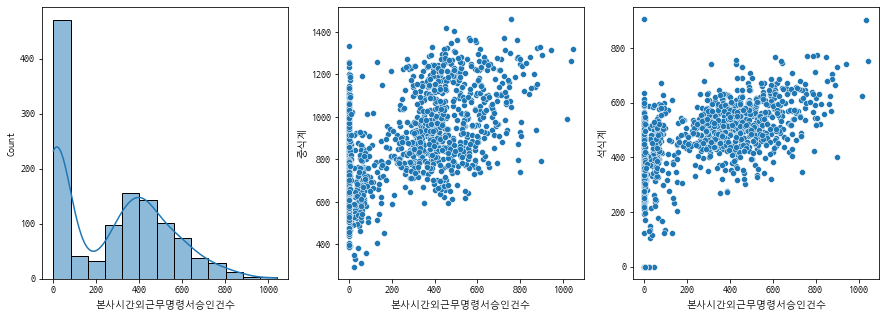

In [14]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(train["본사시간외근무명령서승인건수"], ax=ax[0], kde=True)
sns.scatterplot(data=train, x="본사시간외근무명령서승인건수", y="중식계", ax=ax[1])
sns.scatterplot(data=train, x="본사시간외근무명령서승인건수", y="석식계", ax=ax[2])

plt.show()

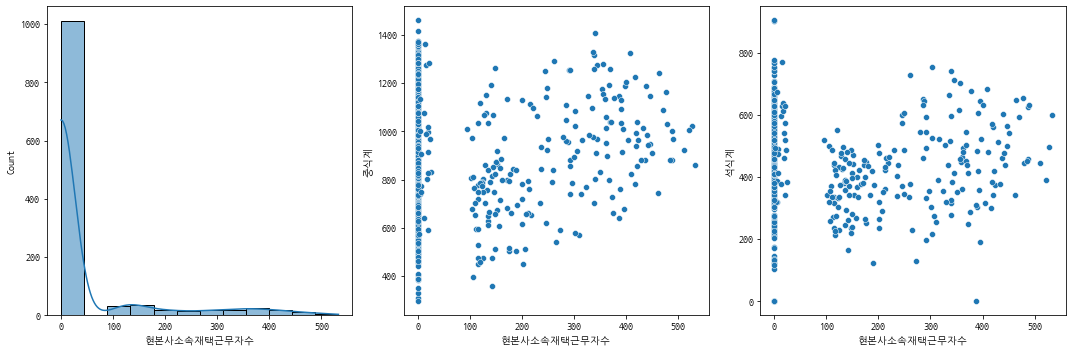

In [16]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(train["현본사소속재택근무자수"], ax=ax[0], kde=True)
sns.scatterplot(data=train, x="현본사소속재택근무자수", y="중식계", ax=ax[1])
sns.scatterplot(data=train, x="현본사소속재택근무자수", y="석식계", ax=ax[2])

plt.tight_layout()

In [22]:
import plotly.express as px

fig = px.line(train, x="일자", y="현본사소속재택근무자수")
fig.show()

In [23]:
# feature Engineering의 기본, 우선 비율을 추가해봅니다.
train["휴가자비율"] = train["본사휴가자수"] / train["본사정원수"]
train["출장자비율"] = train["본사출장자수"] / train["본사정원수"]
train["추가근무자비율"] = train["본사시간외근무명령서승인건수"] / train["본사정원수"]

test["휴가자비율"] = test["본사휴가자수"] / test["본사정원수"]
test["출장자비율"] = test["본사출장자수"] / test["본사정원수"]
test["추가근무자비율"] = test["본사시간외근무명령서승인건수"] / test["본사정원수"]

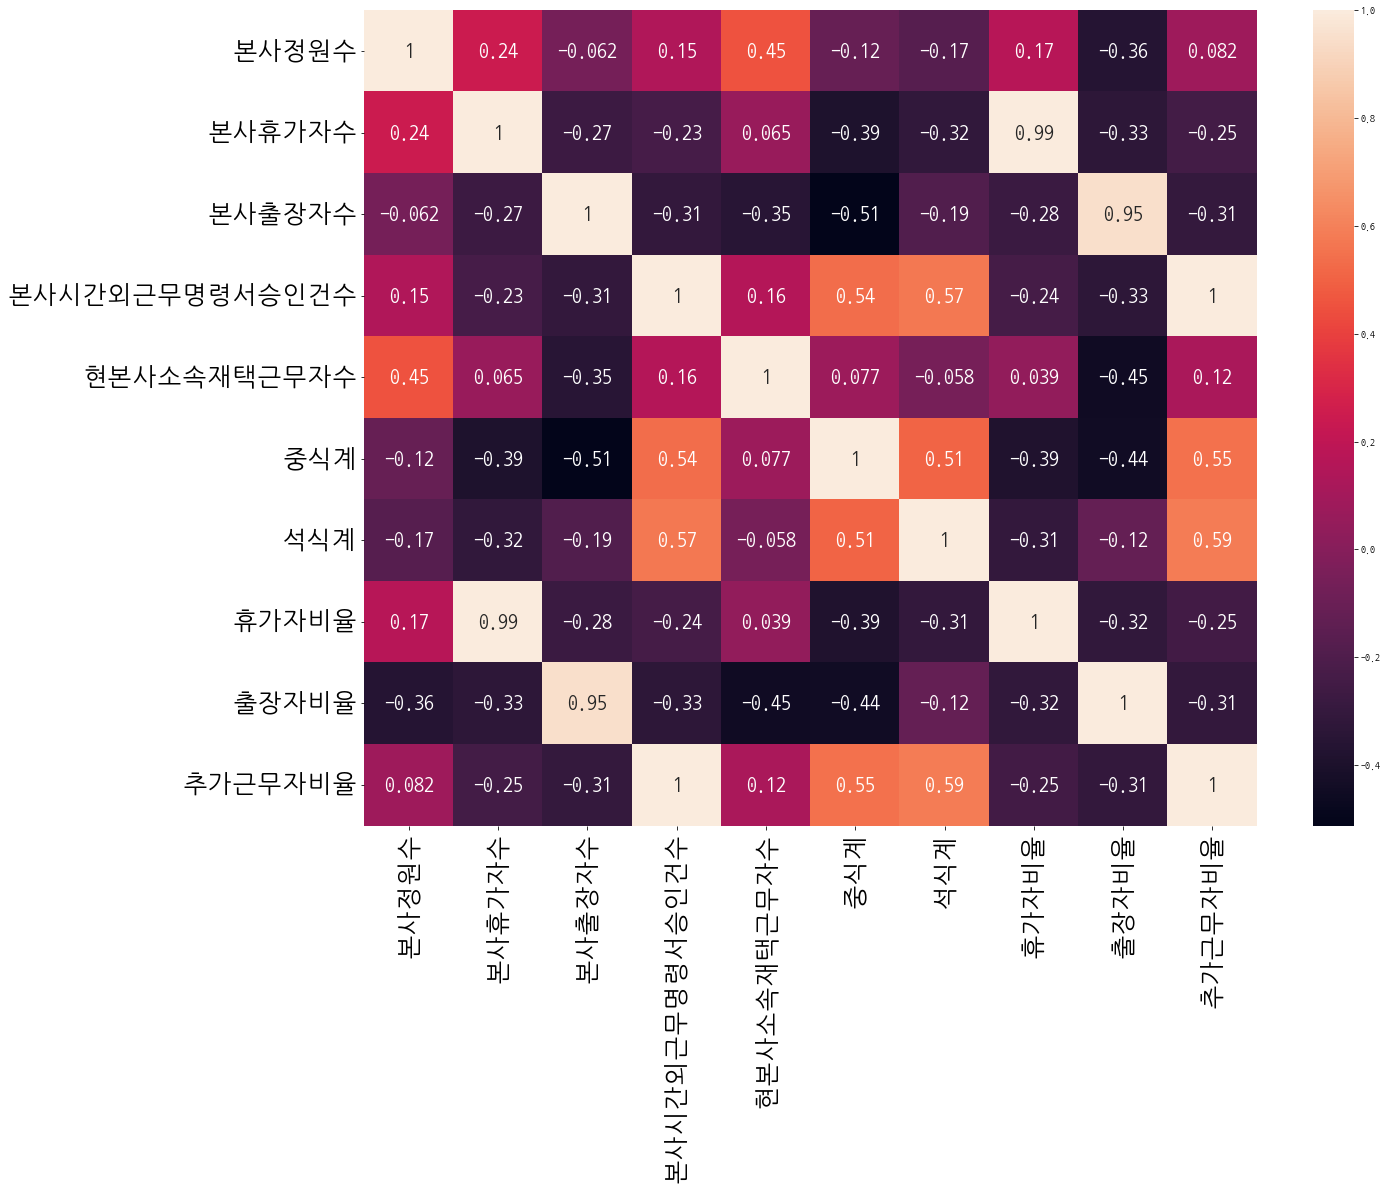

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, annot_kws={"size": 20})  # annot 크기 조정
plt.tick_params(labelsize=25)  # label 크기 조정

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
